#### Problem Statement

* Here we have to identify the number of users which are performing credit card frauds

#### Data preprocessing

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8,4
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* here class is our Target Column
* 0 -> Credit Card Fraud didnot occur
* 1 -> Credit Card Fraud occur

In [3]:
# Normalizing the Amount column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset["Amount"] = scaler.fit_transform(dataset["Amount"].values.reshape(-1,1))
dataset["Amount"]

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [5]:
# removing the Time Column
dataset = dataset.drop(columns=["Time"])
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


#### Data Visualization

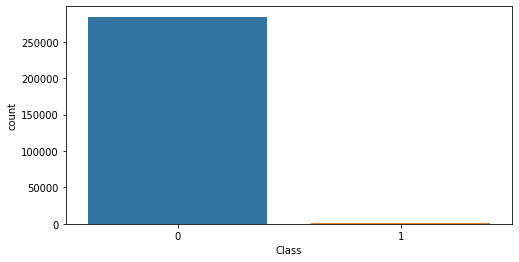

In [6]:
# making the countplot of the target variable (Class)
sns.countplot(data = dataset , x = dataset["Class"])

* Thus it can be noticed that very less no. of people have done credit card fraud 

#### Deep Learning Model Deployment

In [7]:
# splitting the dataset into independent(x) and dependent(y) dataset
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

print(x)
print(y)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  2.44964263e-01]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02 -3.42474541e-01]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  1.16068593e+00]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02 -8.18393021e-02]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01 -3.13248531e-01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  5.14355311e-01]]
[0 0 0 ... 0 0 0]


In [8]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .20 , random_state = None)

print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[-5.13552097  4.31029748 -1.08105502 ... -0.521036   -1.31099926
  -0.34587291]
 [ 2.06265883 -1.0101859  -1.13495408 ... -0.05139108 -0.05346523
  -0.13133561]
 [-1.18694069  0.44416893  1.53480177 ... -0.02316619  0.06708208
  -0.33887626]
 ...
 [ 2.26853591 -0.6235657  -1.76714148 ... -0.03642301 -0.06070879
  -0.25327724]
 [ 2.05558462 -1.37330575  0.23280624 ...  0.04755573 -0.04423984
  -0.25331722]
 [ 2.05385877  0.0176197  -1.04430247 ... -0.06062281 -0.05817396
  -0.34531318]]
[[-1.9708209   0.28296675  0.83804742 ... -0.16546179 -0.17298253
   0.18419335]
 [-0.37605752  1.26023749 -1.22576689 ...  0.26600395  0.18935193
  -0.34399381]
 [-0.13896399 -2.17189902 -0.02973361 ... -0.15776567  0.13643119
   2.43203735]
 ...
 [ 1.309839   -0.52151027  0.30212086 ... -0.01311025  0.00840494
  -0.18590949]
 [ 2.06811321  0.29786807 -2.1336283  ... -0.03915163 -0.0728385
  -0.34923131]
 [ 2.23652898 -1.49459643 -1.05354947 ... -0.00707294 -0.05579936
  -0.25327724]]
[0 0 0 ... 0 0 0]

In [16]:
# building deep neural network model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()

dropout = .25

from keras.callbacks import History 
history = History()

# full connection
classifier.add(Dense(units = 24 , activation = "relu"))   # first_fully_connected_hidden_layer
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 24 , activation = "relu"))   # second_fully_connected_hidden_layer
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 24 , activation = "relu"))   # third_fully_connected_hidden_layer
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 1 , activation = "sigmoid"))   # output_layer

# compiling the cnn model
classifier.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

# deploying the model on the training dataset
classifier.fit(x_train , y_train , epochs= 10 , batch_size= 32, callbacks=[history])

Epoch 1/10
227845/227845 [==============================] - 9s 38us/step - loss: 0.0149 - accuracy: 0.9958
Epoch 2/10
227845/227845 [==============================] - 8s 37us/step - loss: 0.0043 - accuracy: 0.9992
Epoch 3/10
227845/227845 [==============================] - 8s 37us/step - loss: 0.0041 - accuracy: 0.9993
Epoch 4/10
227845/227845 [==============================] - 9s 38us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 5/10
227845/227845 [==============================] - 9s 42us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/10
227845/227845 [==============================] - 9s 41us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 7/10
227845/227845 [==============================] - 9s 41us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/10
227845/227845 [==============================] - 9s 41us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 9/10
227845/227845 [==============================] - 9s 41us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
227845/227845 [==========

In [21]:
# predicting new values from the neural net model 
y_preg = classifier.predict(x_test)
y_preg = y_preg > 0.5

[[56846    18]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.76      0.78        98

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



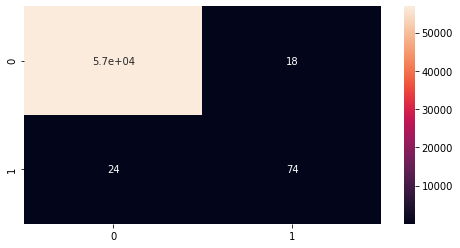

In [22]:
# making a confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test , y_preg)
print(cm)

report = classification_report(y_test , y_preg)
print(report)

sns.heatmap(cm , annot= True)


* This is our Final Result